# 🔍 Reporte del Pipeline de Clustering

Este notebook presenta un análisis completo del pipeline de clustering, mostrando los resultados de los 4 algoritmos evaluados (K-Means, DBSCAN, Agglomerative, GMM) y sus métricas de evaluación.


## 1. Configuración e Importación de Librerías


In [1]:
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kedro.framework.startup import bootstrap_project
from kedro.framework.session import KedroSession

# Configurar estilo de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("✅ Librerías importadas correctamente")


[11/27/25 02:35:57] INFO     Using 'C:\Users\raulr\OneDrive\Escritorio\Proyecto                     __init__.py:270
                             definitivo\proyecto-kedro\venv\Lib\site-packages\kedro\framework\proje                
                             ct\rich_logging.yml' as logging configuration.                                        

✅ Librerías importadas correctamente


## 2. Cargar el Reporte desde el Catálogo de Kedro


In [2]:
# Inicializar proyecto Kedro
project_path = Path.cwd().parent
bootstrap_project(project_path)
session = KedroSession.create(project_path=project_path)
catalog = session.load_context().catalog

# Cargar el reporte de clustering
analisis_cl = catalog.load('analisis_pipeline_clustering')

print("✅ Reporte cargado exitosamente")
print(f"📋 Claves principales: {list(analisis_cl.keys())}")


[11/27/25 02:36:01] INFO     Loading data from analisis_pipeline_clustering (PickleDataset)... data_catalog.py:1046

✅ Reporte cargado exitosamente
📋 Claves principales: ['resumen_general', 'preparacion_datos', 'algoritmos', 'comparacion_algoritmos', 'outputs_generados', 'recomendaciones']


## 3. Resumen General del Pipeline de Clustering


In [3]:
resumen = analisis_cl['resumen_general']

print("=" * 80)
print("📊 RESUMEN GENERAL DEL PIPELINE DE CLUSTERING")
print("=" * 80)
print(f"\n📊 Muestras totales: {resumen['muestras_totales']:,}")
print(f"📋 Features utilizadas: {resumen['features_utilizadas']}")
print(f"📝 Features: {', '.join(resumen['features_lista'])}")
print(f"\n🔬 Algoritmos evaluados: {resumen['algoritmos_evaluados']}")


📊 RESUMEN GENERAL DEL PIPELINE DE CLUSTERING

📊 Muestras totales: 10,000
📋 Features utilizadas: 6
📝 Features: CANTIDAD, MES, PRODUCTO_ID, COMUNA_ID, VENTA_MES_ANTERIOR, AUMENTA

🔬 Algoritmos evaluados: 4


## 4. Comparación de Algoritmos


🏆 COMPARACIÓN DE ALGORITMOS

🥇 Mejor Silhouette Score: Agglomerative (0.3236)
🥇 Mejor Davies-Bouldin: DBSCAN (0.8989)
🥇 Mejor Calinski-Harabasz: K-Means (2316.72)


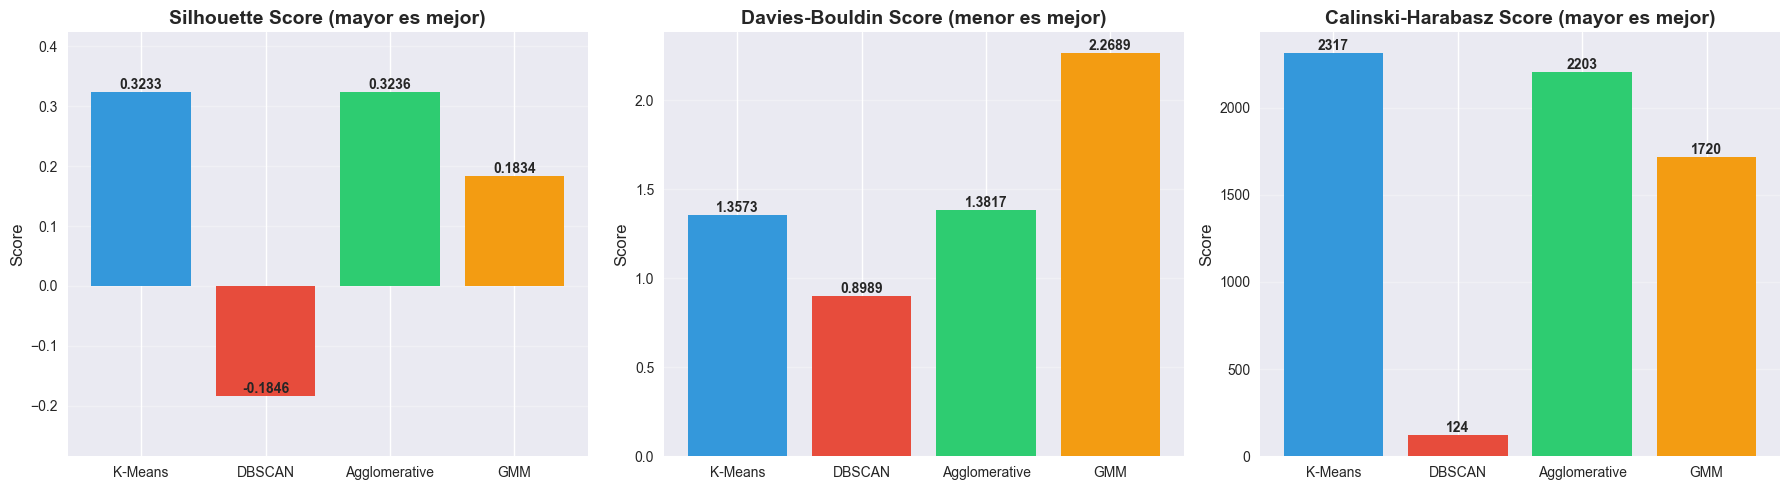

In [4]:
comparacion = analisis_cl['comparacion_algoritmos']

print("=" * 80)
print("🏆 COMPARACIÓN DE ALGORITMOS")
print("=" * 80)
print(f"\n🥇 Mejor Silhouette Score: {comparacion['mejor_silhouette']['algoritmo']} ({comparacion['mejor_silhouette']['score']:.4f})")
print(f"🥇 Mejor Davies-Bouldin: {comparacion['mejor_davies_bouldin']['algoritmo']} ({comparacion['mejor_davies_bouldin']['score']:.4f})")
print(f"🥇 Mejor Calinski-Harabasz: {comparacion['mejor_calinski_harabasz']['algoritmo']} ({comparacion['mejor_calinski_harabasz']['score']:.2f})")

# Visualización comparativa
algoritmos = ['K-Means', 'DBSCAN', 'Agglomerative', 'GMM']
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for algo_key in ['kmeans', 'dbscan', 'agglomerative', 'gmm']:
    algo_data = analisis_cl['algoritmos'][algo_key]
    silhouette_scores.append(algo_data['metricas']['silhouette_score'] if algo_data['metricas']['silhouette_score'] else 0)
    davies_bouldin_scores.append(algo_data['metricas']['davies_bouldin_score'] if algo_data['metricas']['davies_bouldin_score'] else 0)
    calinski_harabasz_scores.append(algo_data['metricas']['calinski_harabasz_score'] if algo_data['metricas']['calinski_harabasz_score'] else 0)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].bar(algoritmos, silhouette_scores, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'])
axes[0].set_title('Silhouette Score (mayor es mejor)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([min(silhouette_scores) - 0.1, max(silhouette_scores) + 0.1])
for i, v in enumerate(silhouette_scores):
    axes[0].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Davies-Bouldin Score
axes[1].bar(algoritmos, davies_bouldin_scores, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'])
axes[1].set_title('Davies-Bouldin Score (menor es mejor)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Score', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(davies_bouldin_scores):
    axes[1].text(i, v, f'{v:.4f}', ha='center', va='bottom', fontweight='bold')

# Calinski-Harabasz Score
axes[2].bar(algoritmos, calinski_harabasz_scores, color=['#3498DB', '#E74C3C', '#2ECC71', '#F39C12'])
axes[2].set_title('Calinski-Harabasz Score (mayor es mejor)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Score', fontsize=12)
axes[2].grid(axis='y', alpha=0.3)
for i, v in enumerate(calinski_harabasz_scores):
    axes[2].text(i, v, f'{v:.0f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


In [5]:
algoritmos_data = analisis_cl['algoritmos']

for algo_key, algo_name in [('kmeans', 'K-Means'), ('dbscan', 'DBSCAN'), 
                            ('agglomerative', 'Agglomerative'), ('gmm', 'GMM')]:
    algo = algoritmos_data[algo_key]
    
    print(f"\n{'='*80}")
    print(f"🔬 {algo_name} ({algo.get('tipo', 'N/A')})")
    print(f"{'='*80}")
    
    if 'parametros' in algo:
        print(f"\n📊 Parámetros: {algo['parametros']}")
    
    if 'distribucion_clusters' in algo:
        dist_clusters = algo['distribucion_clusters']
        print(f"\n📈 Distribución de clusters:")
        print(f"  - Total de clusters: {dist_clusters.get('n_clusters', 'N/A')}")
        print(f"  - Total de muestras: {dist_clusters.get('total_muestras', 'N/A'):,}")
        
        # Mostrar distribución de cada cluster
        if 'distribucion' in dist_clusters:
            for cluster_id, count in sorted(dist_clusters['distribucion'].items()):
                if cluster_id != -1:  # Excluir ruido de la lista principal
                    pct = (count / dist_clusters.get('total_muestras', 1)) * 100
                    print(f"  - Cluster {cluster_id}: {count:,} puntos ({pct:.1f}%)")
        
        # Mostrar ruido si existe
        n_noise = dist_clusters.get('n_noise', 0)
        if n_noise > 0:
            pct_noise = (n_noise / dist_clusters.get('total_muestras', 1)) * 100
            print(f"  - Ruido: {n_noise:,} puntos ({pct_noise:.1f}%)")
    
    print(f"\n📊 Métricas:")
    metricas = algo.get('metricas', {})
    if metricas.get('silhouette_score') is not None:
        print(f"  - Silhouette Score: {metricas['silhouette_score']:.4f}")
        if 'interpretacion' in algo and 'silhouette' in algo['interpretacion']:
            print(f"    {algo['interpretacion']['silhouette']}")
    if metricas.get('davies_bouldin_score') is not None:
        print(f"  - Davies-Bouldin Score: {metricas['davies_bouldin_score']:.4f}")
        if 'interpretacion' in algo and 'davies_bouldin' in algo['interpretacion']:
            print(f"    {algo['interpretacion']['davies_bouldin']}")
    if metricas.get('calinski_harabasz_score') is not None:
        print(f"  - Calinski-Harabasz Score: {metricas['calinski_harabasz_score']:.2f}")
        if 'interpretacion' in algo and 'calinski_harabasz' in algo['interpretacion']:
            print(f"    {algo['interpretacion']['calinski_harabasz']}")



🔬 K-Means (Particional)

📊 Parámetros: {'n_clusters': 3, 'random_state': 42}

📈 Distribución de clusters:
  - Total de clusters: 3
  - Total de muestras: 10,000
  - Cluster 0: 2,451 puntos (24.5%)
  - Cluster 1: 7,154 puntos (71.5%)
  - Cluster 2: 395 puntos (4.0%)

📊 Métricas:
  - Silhouette Score: 0.3233
    0.32 indica clusters moderadamente bien separados
  - Davies-Bouldin Score: 1.3573
    1.35 indica separación razonable entre clusters
  - Calinski-Harabasz Score: 2316.72
    2317 indica buena separación entre clusters

🔬 DBSCAN (Basado en densidad)

📊 Parámetros: {'eps': 0.5, 'min_samples': 5}

📈 Distribución de clusters:
  - Total de clusters: 27
  - Total de muestras: 10,000
  - Cluster 0: 6,744 puntos (67.4%)
  - Cluster 1: 1,769 puntos (17.7%)
  - Cluster 2: 5 puntos (0.1%)
  - Cluster 3: 7 puntos (0.1%)
  - Cluster 4: 24 puntos (0.2%)
  - Cluster 5: 6 puntos (0.1%)
  - Cluster 6: 15 puntos (0.1%)
  - Cluster 7: 17 puntos (0.2%)
  - Cluster 8: 7 puntos (0.1%)
  - Cluster 9

## 6. Recomendaciones


In [6]:
recomendaciones = analisis_cl.get('recomendaciones', {})

print("=" * 80)
print("💡 RECOMENDACIONES")
print("=" * 80)

if 'mejor_algoritmo_general' in recomendaciones:
    print(f"\n🏆 Mejor algoritmo general: {recomendaciones['mejor_algoritmo_general']}")
if 'para_outliers' in recomendaciones:
    print(f"🔍 Para outliers: {recomendaciones['para_outliers']}")
if 'para_clusters_elípticos' in recomendaciones:
    print(f"📊 Para clusters elípticos: {recomendaciones['para_clusters_elípticos']}")

# Generar observaciones automáticamente si no existen
observaciones = recomendaciones.get('observaciones', [])

# Agregar observaciones automáticas basadas en métricas
comparacion = analisis_cl.get('comparacion_algoritmos', {})
if comparacion:
    mejor_sil = comparacion.get('mejor_silhouette', {})
    if mejor_sil:
        observaciones.append(f"El mejor algoritmo según Silhouette Score es {mejor_sil.get('algoritmo', 'N/A')} con {mejor_sil.get('score', 0):.4f}.")
    
    mejor_db = comparacion.get('mejor_davies_bouldin', {})
    if mejor_db:
        observaciones.append(f"El mejor algoritmo según Davies-Bouldin es {mejor_db.get('algoritmo', 'N/A')} con {mejor_db.get('score', 0):.4f} (menor es mejor).")

# Análisis de ruido en DBSCAN
if 'algoritmos' in analisis_cl and 'dbscan' in analisis_cl['algoritmos']:
    dbscan = analisis_cl['algoritmos']['dbscan']
    if 'distribucion_clusters' in dbscan:
        n_noise = dbscan['distribucion_clusters'].get('n_noise', 0)
        if n_noise > 0:
            total = dbscan['distribucion_clusters'].get('total_muestras', 1)
            pct_noise = (n_noise / total) * 100
            observaciones.append(f"DBSCAN identificó {n_noise:,} puntos de ruido ({pct_noise:.1f}% del total), útil para detección de outliers.")

print(f"\n📝 Observaciones:")
if observaciones:
    for i, obs in enumerate(observaciones, 1):
        print(f"  {i}. {obs}")
else:
    print("  No hay observaciones adicionales registradas.")

print("\n" + "=" * 80)
print("✅ Análisis del Pipeline de Clustering Completado")
print("=" * 80)


💡 RECOMENDACIONES

🏆 Mejor algoritmo general: K-Means o Agglomerative (Silhouette ~0.32)
🔍 Para outliers: DBSCAN (identifica 12.8% de puntos de ruido)
📊 Para clusters elípticos: GMM

📝 Observaciones:
  1. K-Means y Agglomerative tienen métricas similares y mejores resultados
  2. DBSCAN encontró muchos clusters pequeños (27) y muchos outliers
  3. GMM tiene peor separación que K-Means/Agglomerative
  4. Todos los algoritmos usan 3 clusters excepto DBSCAN que encuentra automáticamente 27
  5. El mejor algoritmo según Silhouette Score es Agglomerative con 0.3236.
  6. El mejor algoritmo según Davies-Bouldin es DBSCAN con 0.8989 (menor es mejor).
  7. DBSCAN identificó 1,285 puntos de ruido (12.8% del total), útil para detección de outliers.

✅ Análisis del Pipeline de Clustering Completado


In [ ]:
# Cerrar sesión de Kedro
session.close()
print("✅ Sesión de Kedro cerrada")
